In [55]:
import numpy as np
import matplotlib.pyplot as plt
from utils import contour_plot

In [3]:
p = np.array([[1/8, 1/8, 0, 0],
              [1/8, 1/8, 0, 0],
              [0, 0, 1/4, 0],
              [0, 0, 0, 1/4],
             ])

In [52]:
def kl(x):
    a = x[:, 0]
    b = x[:, 1]
    q_x = np.array([a, a, 1 / 2 - a, 1 / 2 - a]).reshape(4, len(a))
    q_y = np.array([b, b, 1 / 2 - b, 1 / 2 - b]).reshape(4, len(b))
    q = np.einsum("ik,jk->kij", q_x, q_y)
    div = np.zeros(shape=(len(x),))

    for i in range(len(div)):
        for coords, prob in np.ndenumerate(p):
            if prob > 0:
                div[i] += q[i][coords] * np.log(q[i][coords] / prob)
    return div

<ipython-input-52-91eee332cca5>:12: RuntimeWarning: invalid value encountered in log
  div[i] += q[i][coords] * np.log(q[i][coords] / prob)


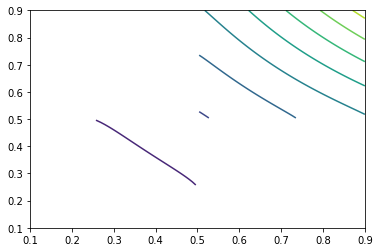

In [57]:
contour_plot([kl], x_center=0.5, x_range=0.4, y_center=0.5, y_range=0.4)